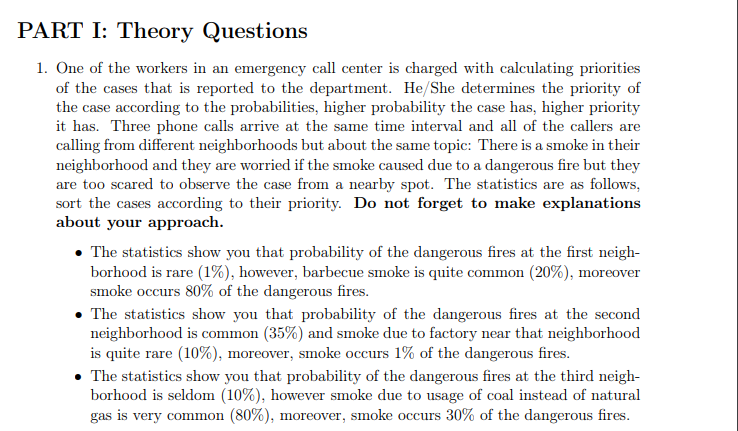

### To apply Bayes' theorem across neighborhoods, we are using the formula: P(Dangerous Fire∣Smoke)= P(Smoke∣Dangerous Fire)⋅P(Dangerous Fire) / P(smoke)

### However, since we're only comparing probabilities, we ignore P(Smoke), as it’s a common denominator. We'll calculate relative priorities for each neighborhood by focusing on                      P(Smoke∣Dangerous Fire)⋅P(Dangerous Fire).

## First Neighborhood:  
### P(Dangerous Fire) = 0.01 , P(Barbecue Smoke) = 0.20 , P(Smoke|Dangerous Fire) = 0.80. Relative Priority: 0.80 . 0.01 = 0.008

## Second Neighborhood:
### P(Dangerous Fire) = 0.35 , P(Factory Smoke) = 0.10 , P(Smoke|Dangerous Fire) = 0.01. Relative Priority: 0.01 ⋅ 0.35= 0.0035
 
## Third Neighborhood:
### P(Dangerous Fire) = 0.10 , P(Coal Smoke) = 0.80 , P(Smoke|Dangerous Fire) = 0.30. Relative Priority: 0.30 ⋅ 0.10= 0.03

## Based on calculated priorities:

### 1. Third Neighborhood (highest priority, 0.03)
### 2. First Neighborhood (0.008)
### 3. Second Neighborhood (0.0035)

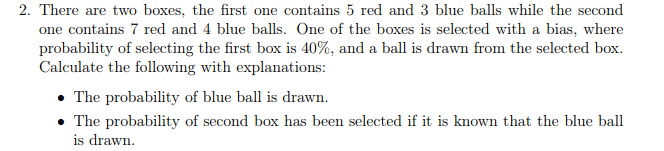

## Given:
### Box 1: 5 red balls and 3 blue balls.
### Box 2: 7 red balls and 4 blue balls.
### Probability of selecting Box 1 = 0.4, and Box 2 = 0.6.
## The probability of drawing a blue ball from each box is:
### P(Blue∣Box 1)= 3/8 , 𝑃(Blue∣Box 2)= 4/11
### Using the law of total probability:
### 𝑃(Blue)=𝑃(Blue∣Box 1)⋅𝑃(Box 1)+𝑃(Blue∣Box 2)⋅𝑃(Box 2) 
### Substituting the values: 𝑃(Blue)=(3/8) . 0.4 +(4/11) ⋅ 0.6 = 0.3682
### So, the probability of drawing a blue ball, P(Blue), is approximately 0.3682.
## Probability of Selecting Box 2 Given a Blue Ball is Drawn P(Box 2∣Blue):
### Using Bayes' theorem: P(Box 2∣Blue)= P(Blue∣Box 2)⋅P(Box 2) / P(Blue)
### Substituting the values:
### P(Box 2∣Blue)=(4/11)⋅0.6 / 0.3682
### Calculating the numerator: P(Box 2∣Blue) = (0.2182) / (0.3682) = 0.654
### So, the probability of having selected Box 2 given that a blue ball was drawn, P(Box 2∣Blue), is approximately 0.654.

# Text classification is the primary application for Naïve Bayes classifier methods.(T)
### Naïve Bayes classifiers are widely used for text classification tasks, including spam filtering and sentiment analysis.
# When an attribute value in the testing record has no example in the training set, the total posterior probability in a Naïve Bayes algorithm will be zero.(T)
### In Naïve Bayes, each feature's probability is multiplied to form the posterior probability. If a feature in the test data has not been seen in the training data, the product for the entire posterior probability becomes zero.

In [ ]:
import os
import matplotlib.pyplot as plt

# Directories 
train_dir_pos = "C:/Users/Arda Deniz/Desktop/MachineLearning_ass2/train/pos"
train_dir_neg = "C:/Users/Arda Deniz/Desktop/MachineLearning_ass2/train/neg"
test_dir_pos = "C:/Users/Arda Deniz/Desktop/MachineLearning_ass2/test/pos"
test_dir_neg = "C:/Users/Arda Deniz/Desktop/MachineLearning_ass2/test/neg"

In [2]:
def load_reviews(pos_dir, neg_dir):
    reviews = []
    labels = []
    
    for filename in os.listdir(pos_dir):
        if filename.endswith(".txt"):
            file_path = os.path.join(pos_dir, filename)
            with open(file_path, "r", encoding="utf-8") as file:
                reviews.append(file.read().strip())
                labels.append(1)  # Positive label
    
    for filename in os.listdir(neg_dir):
        if filename.endswith(".txt"):
            file_path = os.path.join(neg_dir, filename)
            with open(file_path, "r", encoding="utf-8") as file:
                reviews.append(file.read().strip())
                labels.append(0)  # Negative label
    
    return reviews, labels

In [3]:
train_reviews, train_labels = load_reviews(train_dir_pos, train_dir_neg)
test_reviews, test_labels = load_reviews(test_dir_pos, test_dir_neg)


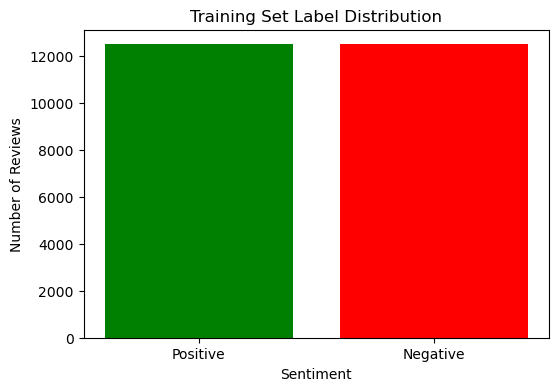

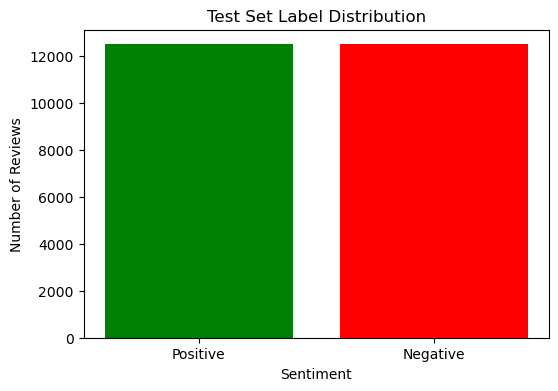

In [4]:
def plot_label_distribution(labels, title):
    pos_count = sum(labels)
    neg_count = len(labels) - pos_count
    plt.figure(figsize=(6, 4))
    plt.bar(["Positive", "Negative"], [pos_count, neg_count], color=["green", "red"])
    plt.title(title)
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Reviews")
    plt.show()

    
plot_label_distribution(train_labels, "Training Set Label Distribution")
plot_label_distribution(test_labels, "Test Set Label Distribution")

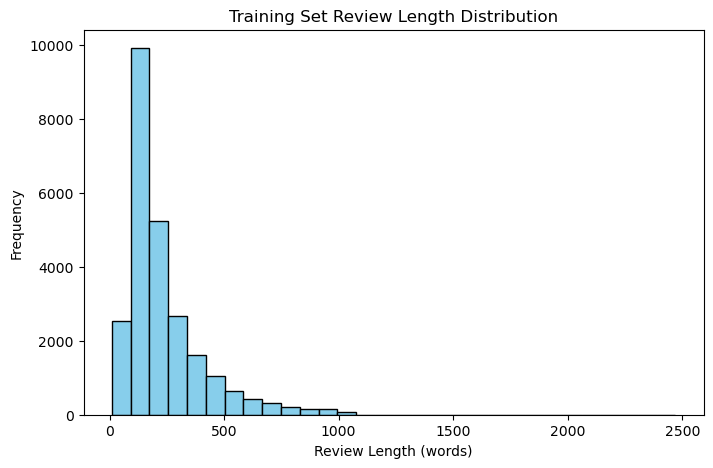

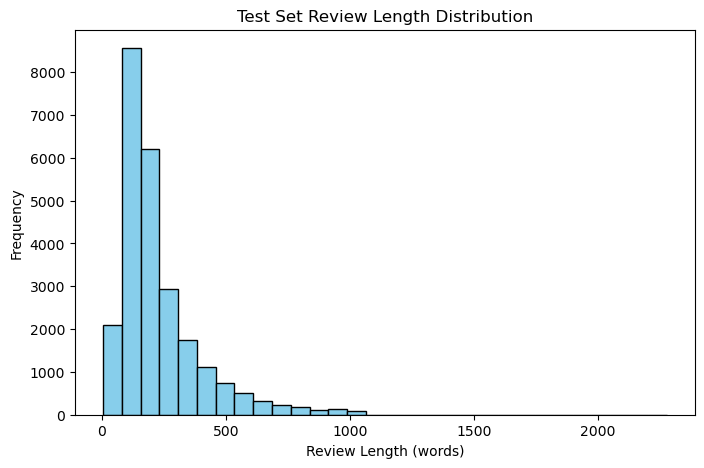

In [5]:
def plot_review_length_distribution(reviews, title):
    review_lengths = [len(review.split()) for review in reviews]
    plt.figure(figsize=(8, 5))
    plt.hist(review_lengths, bins=30, color="skyblue", edgecolor="black")
    plt.title(title)
    plt.xlabel("Review Length (words)")
    plt.ylabel("Frequency")
    plt.show()


plot_review_length_distribution(train_reviews, "Training Set Review Length Distribution")
plot_review_length_distribution(test_reviews, "Test Set Review Length Distribution")

## According to these graphs review lengths seem similar to each other. There is not a significant difference between the graphs

In [6]:
import re
import math
from collections import Counter, defaultdict

In [7]:
def tokenize(text, n=1):
    tokens = re.findall(r'\b\w+\b', text.lower())
    ngrams = []
    for i in range(1, n+1):
        ngrams += [' '.join(tokens[j:j+i]) for j in range(len(tokens)-i+1)]
    return ngrams

## This function extracts words (unigrams) and pairs of consecutive words (bigrams,trigram) from each review. Including all types of tokens helps capture different n-gram representations of text data.

In [8]:
def train_naive_bayes(reviews, labels, n=1, smoothing=1):
    vocab = set()
    word_counts = {'pos': Counter(), 'neg': Counter()}
    class_counts = {'pos': 0, 'neg': 0}
    total_words = {'pos': 0, 'neg': 0}

    for review, label in zip(reviews, labels):
        class_label = 'pos' if label == 1 else 'neg'
        class_counts[class_label] += 1
        tokens = tokenize(review, n)
        word_counts[class_label].update(tokens)
        total_words[class_label] += len(tokens)
        vocab.update(tokens)
    
    vocab = list(vocab)

    # Precompute log probabilities for each word
    log_probabilities = {'pos': {}, 'neg': {}}
    for word in vocab:
        log_probabilities['pos'][word] = math.log((word_counts['pos'][word] + smoothing) /
                                                  (total_words['pos'] + smoothing * len(vocab)))
        log_probabilities['neg'][word] = math.log((word_counts['neg'][word] + smoothing) /
                                                  (total_words['neg'] + smoothing * len(vocab)))

    # Store log priors 
    log_prior_pos = math.log(class_counts['pos'] / sum(class_counts.values()))
    log_prior_neg = math.log(class_counts['neg'] / sum(class_counts.values()))
    
    return vocab, log_probabilities, log_prior_pos, log_prior_neg

## We are constructing the vocabulary by counting each word’s occurrences in positive and negative reviews.

In [9]:
def predict_naive_bayes(review, vocab, log_probabilities, log_prior_pos, log_prior_neg, unknown_prob=-10):
    tokens = tokenize(review)
    
    # Initialize log probabilities 
    log_prob_pos = log_prior_pos
    log_prob_neg = log_prior_neg
    
    for token in tokens:
        # Use precomputed log probabilities if the word exists in vocab
        log_prob_pos += log_probabilities['pos'].get(token, unknown_prob)
        log_prob_neg += log_probabilities['neg'].get(token, unknown_prob)
    
    # Predict the class with the higher log-probability
    return 1 if log_prob_pos > log_prob_neg else 0

## This prediction function uses log probabilities to handle the underflow that would occur with raw probabilities. In this approach, rather than multiplying probabilities, the function sums up the log probabilities.

In [10]:
def calculate_metrics(true_labels, predictions):
    TP = sum((pred == 1 and true == 1) for pred, true in zip(predictions, true_labels))
    TN = sum((pred == 0 and true == 0) for pred, true in zip(predictions, true_labels))
    FP = sum((pred == 1 and true == 0) for pred, true in zip(predictions, true_labels))
    FN = sum((pred == 0 and true == 1) for pred, true in zip(predictions, true_labels))
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    return accuracy, precision, recall, f1_score

In [11]:
def evaluate_naive_bayes_n_gram(train_reviews, train_labels, test_reviews, test_labels, n=1, smoothing=1):
    # Train model for the given n-gram 
    vocab, log_probabilities, log_prior_pos, log_prior_neg = train_naive_bayes(train_reviews, train_labels, n, smoothing)
    predictions = [predict_naive_bayes(review, vocab, log_probabilities, log_prior_pos, log_prior_neg, n) for review in test_reviews]
    accuracy, precision, recall, f1_score = calculate_metrics(test_labels, predictions)
    
    return accuracy, precision, recall, f1_score

## This function calculates the model’s accuracy for every model by comparing predicted labels to true labels in the test set.

In [12]:
for n in [1, 2, 3]:  # 1 for unigram, 2 for bigram, 3 for trigram
    print(f"Evaluating {n}-gram model:")
    accuracy, precision, recall, f1_score = evaluate_naive_bayes_n_gram(train_reviews, train_labels, test_reviews, test_labels, n)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")
    print("---------------")

Evaluating 1-gram model:
Accuracy: 0.8102
Precision: 0.8577
Recall: 0.7438
F1 Score: 0.7967
---------------
Evaluating 2-gram model:
Accuracy: 0.8146
Precision: 0.8516
Recall: 0.7620
F1 Score: 0.8043
---------------
Evaluating 3-gram model:
Accuracy: 0.8158
Precision: 0.8432
Recall: 0.7760
F1 Score: 0.8082
---------------


## In summary, these results convey that amongst the tested n-gram models, performance is optimal with 3-grams, and increases metrics slightly with context.

# Bonus:

In [13]:
import os
import re
import gensim
import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

def load_data(directory):
    reviews, labels = [], []
    for label, folder in [('pos', 'pos'), ('neg', 'neg')]:
        folder_path = os.path.join(directory, folder)
        for filename in os.listdir(folder_path):
            with open(os.path.join(folder_path, filename), 'r', encoding='utf-8') as file:
                reviews.append(file.read())
                labels.append(1 if label == 'pos' else 0)
    return reviews, labels
train_reviews, train_labels = load_data("C:/Users/Arda Deniz/Desktop/MachineLearning_ass2/train")
test_reviews, test_labels = load_data("C:/Users/Arda Deniz/Desktop/MachineLearning_ass2/test")


In [14]:
def preprocess_reviews(reviews):
    return [word_tokenize(re.sub(r'[^\w\s]', '', review.lower())) for review in reviews]

train_tokens = preprocess_reviews(train_reviews)
test_tokens = preprocess_reviews(test_reviews)

## Processes each review to lowercase, removes punctuation, and tokenizes it into words. Tokenized reviews are prepared for the Word2Vec model.

# Train Word2Vec Model:

In [15]:
word2vec_model = Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=2, workers=4)

def get_review_vector(tokens, model, vector_size=100):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

X_train = np.array([get_review_vector(tokens, word2vec_model) for tokens in train_tokens])
X_test = np.array([get_review_vector(tokens, word2vec_model) for tokens in test_tokens])

## This approach allows for an efficient and meaningful representation of a review, which can then be used for downstream tasks like classification or similarity comparison.

# Train Logistic Regression Model:

In [16]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, train_labels)

c:\Users\Arda Deniz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

# Predictions and Performance Evaluation:

In [22]:
y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8070
Precision: 0.8073
Recall: 0.8065
F1-Score: 0.8069


## Next up is the Word2Vec model, which performs near-identically to both our 2-gram and 3-gram models but has a noticeably better recall (but worse precision). The difference implies that the word embeddings of Word2Vec provide a good context for better recall, remembering more positives! On the other hand, n-gram models yield precision and overall accuracy that are slightly higher, which could mean a less generalizable but more accurate method.